In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense, Dropout
from keras.models import Model


In [ ]:
data =pd.read_csv('/content/drive/MyDrive/Datasets/ionosphere_data.csv')
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [ ]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
data.tail()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,...,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g


In [ ]:
data.shape

(351, 35)

In [ ]:
data.dtypes

feature1       int64
feature2       int64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
label         object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [ ]:
data.isnull().sum() #checking missing values

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

In [ ]:
data.reset_index(inplace=True,drop=True)

In [ ]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.95559,-0.00155,0.86421,-0.13244,0.94982,-0.00461,0.82809,-0.51171,...,-0.01664,0.84132,-0.01769,0.82427,-0.01867,0.80634,-0.01957,0.78761,-0.02039,g
1,1,0,0.84557,-0.08580,-0.31745,-0.80553,-0.08961,-0.56435,0.80648,0.04576,...,-0.03718,0.70882,-0.25288,0.77884,-0.14109,-0.21354,-0.78170,-0.18494,-0.59867,b
2,1,0,0.95217,0.06595,0.93614,0.13030,0.90996,0.19152,0.84881,-0.49962,...,0.44199,0.34374,0.43221,0.90330,1.00000,0.23405,0.39620,0.18632,0.37191,g
3,1,0,0.82624,0.08156,0.79078,-0.08156,0.90426,-0.01773,0.92908,0.01064,...,0.15957,0.89527,0.08165,0.77660,0.06738,0.92553,0.18085,0.92553,0.00000,g
4,1,0,-1.00000,-1.00000,-0.50694,1.00000,1.00000,-1.00000,1.00000,0.53819,...,1.00000,0.33333,-1.00000,1.00000,-1.00000,0.69792,-1.00000,0.47569,1.00000,b


In [ ]:
data.shape

(351, 35)

In [ ]:
x_train = data.iloc[0:210,0:-1]
x_test = data.iloc[0:210,-1]
y_train = data.iloc[210:,0:-1]
y_test = data.iloc[210:,-1]

In [ ]:
x_train.drop('feature2',inplace=True,axis=1)

In [ ]:
y_train.drop('feature2',inplace=True,axis=1)

In [ ]:
x_test = x_test.map({'g':1,'b':0})

In [ ]:
x_test.head()

0    1
1    0
2    1
3    1
4    0
Name: label, dtype: int64

In [ ]:
y_test = y_test.map({'g':1,'b':0})

In [ ]:
y_test.head()

210    1
211    1
212    1
213    1
214    1
Name: label, dtype: int64

In [ ]:
#create the input layer
input_layer = Input(shape=(x_train.shape[1],))
#create the other hidden layers and the output layer
hidden_1 = Dense(16,activation='relu')(input_layer)
hidden_2 = Dense(10,activation='relu')(hidden_1)
hidden_3 = Dense(6,activation='relu')(hidden_2)
output = Dense(1,activation='sigmoid')(hidden_3)

In [ ]:
model = Model(inputs=input_layer,outputs=output)

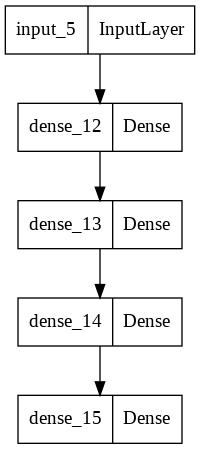

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_test = np.asarray(x_test).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
history = model.fit(x_train,x_test,validation_split=0.2,epochs=200)

Epoch 1/200
6/6 [==============================] - 1s 40ms/step - loss: 0.7467 - accuracy: 0.3393 - val_loss: 0.6771 - val_accuracy: 0.3810
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6834 - accuracy: 0.3750 - val_loss: 0.6443 - val_accuracy: 0.5952
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6490 - accuracy: 0.5893 - val_loss: 0.6307 - val_accuracy: 0.8810
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6256 - accuracy: 0.8095 - val_loss: 0.6198 - val_accuracy: 0.8333
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6085 - accuracy: 0.8571 - val_loss: 0.6097 - val_accuracy: 0.8095
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.5921 - accuracy: 0.8869 - val_loss: 0.5998 - val_accuracy: 0.8333
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 0.5770 - accuracy: 0.9048 - val_loss: 0.5881 - val_accuracy: 0.8333
Epoch 8/200
6/6 [=========

In [ ]:
model.evaluate(y_train,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.9007


[0.4092538058757782, 0.9007092118263245]